In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
try:
    df = pd.read_csv("Datasets/diabetes.csv")
    print("DataFrame successfully loaded!")
except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found.")
    df = None

# Display the first few rows of the DataFrame and its information
if df is not None:
    print("\nDataFrame:")
    print(df)
    print("\nDataFrame info:")
    print(df.info())

DataFrame successfully loaded!

DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

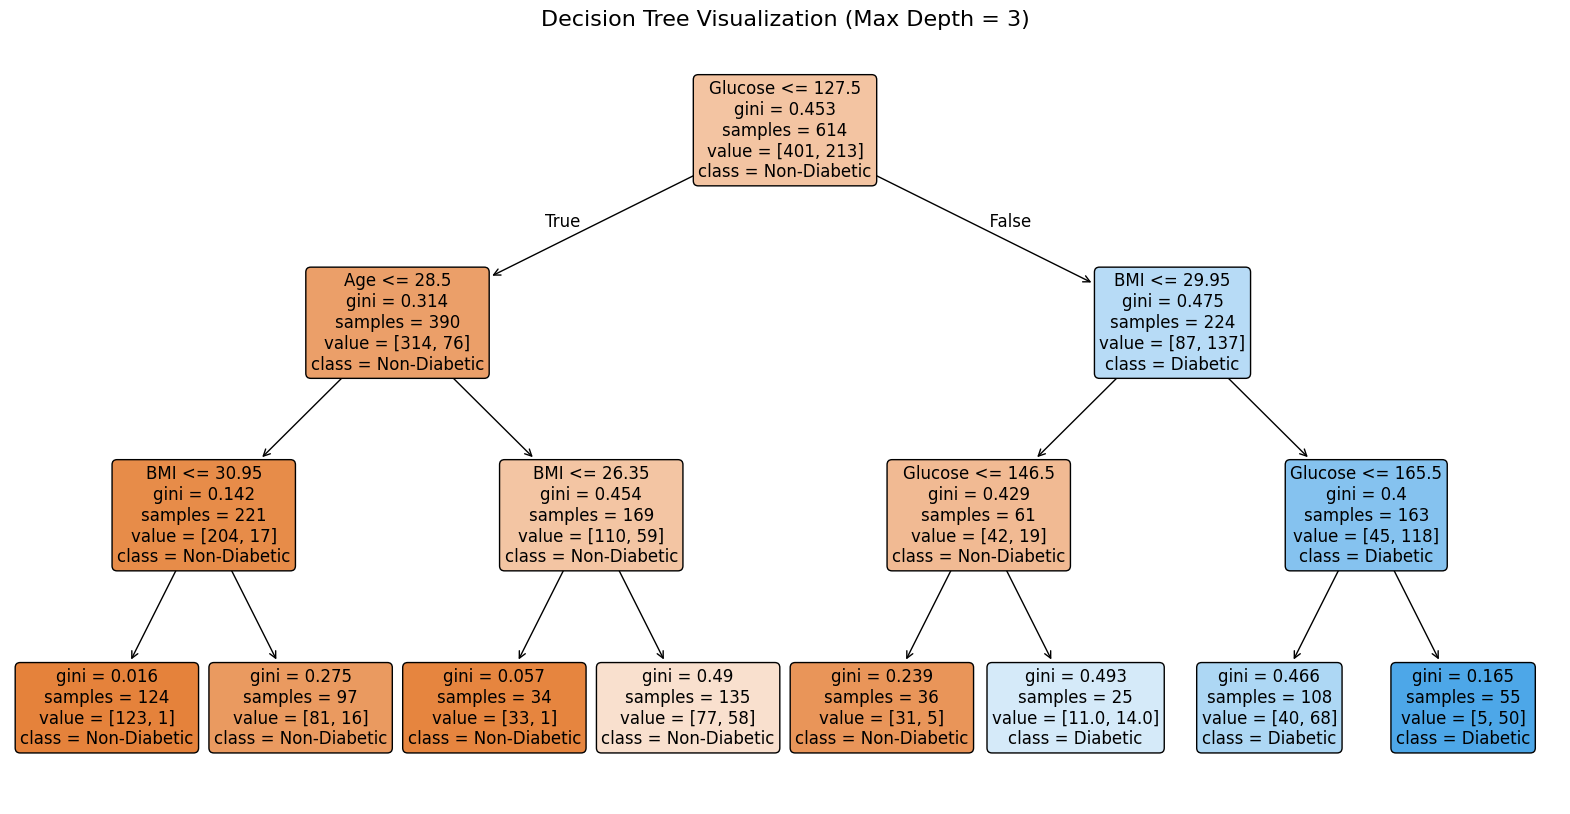

Decision tree visualization has been saved to 'decision_tree_plot.png'.


In [4]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Visualize the decision tree using sklearn's plot_tree (no Graphviz needed)
plt.figure(figsize=(20,10))
plot_tree(
    dtree,
    feature_names=X.columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization (Max Depth = 3)", fontsize=16)
plt.savefig('decision_tree_plot.png')
plt.show()

print("Decision tree visualization has been saved to 'decision_tree_plot.png'.")

Decision tree visualization has been saved to 'decision_tree_plot.png'.


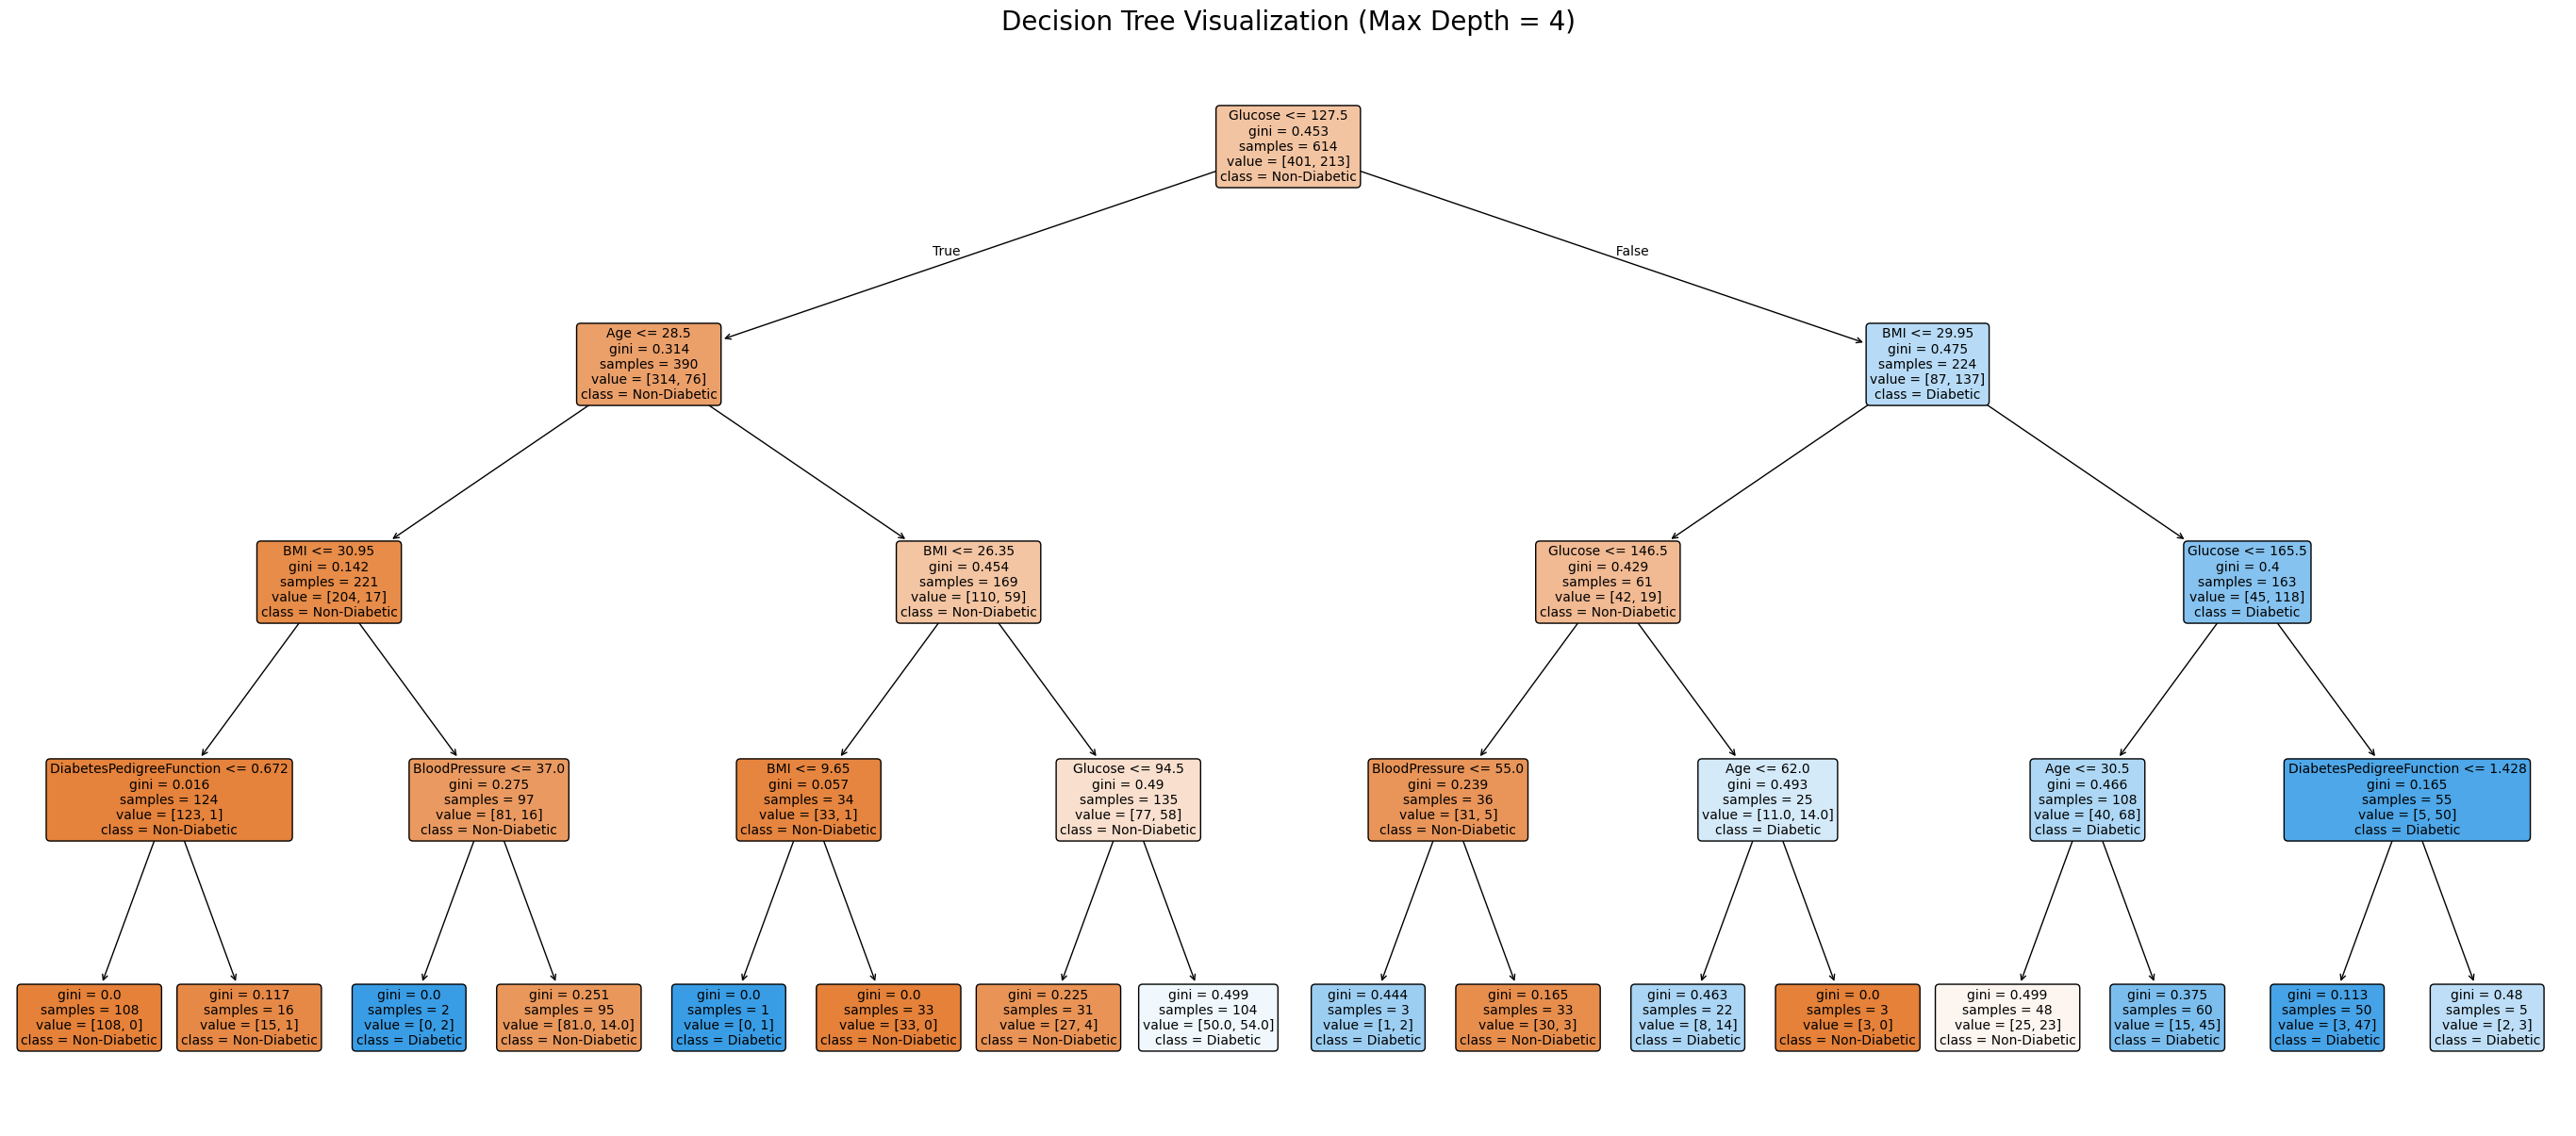

In [21]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier with a max_depth for better visualization
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# --- Plot Decision Tree using sklearn's plot_tree ---
plt.figure(figsize=(35,15))
plot_tree(dtree,
          feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Max Depth = 4)", fontsize=20)
plt.savefig('decision_tree_plot.png')
print("Decision tree visualization has been saved to 'decision_tree_plot.png'.")

In [6]:
# Hyperparameter tuning for Decision Tree using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Create a base DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best estimator on the test set
best_dtree = grid_search.best_estimator_
test_accuracy = best_dtree.score(X_test, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

Best parameters found: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best cross-validation accuracy: 0.7639
Test set accuracy with best parameters: 0.6883
